In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("train_clean.csv")
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [3]:
data = data.drop(columns=["Cabin","Name","PassengerId","Ticket","Title"])
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Family_Size
0,22.0,S,7.2500,0,3,male,1,0.0,1
1,38.0,C,71.2833,0,1,female,1,1.0,1
2,26.0,S,7.9250,0,3,female,0,1.0,0
3,35.0,S,53.1000,0,1,female,1,1.0,1
4,35.0,S,8.0500,0,3,male,0,0.0,0


In [4]:
data.shape

(891, 9)

##### Check for any missing values

In [5]:
data.isnull().sum()

Age            0
Embarked       0
Fare           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived       0
Family_Size    0
dtype: int64

In [6]:
data["Survived"] = data["Survived"].fillna(0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Embarked     891 non-null    object 
 2   Fare         891 non-null    float64
 3   Parch        891 non-null    int64  
 4   Pclass       891 non-null    int64  
 5   Sex          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Survived     891 non-null    float64
 8   Family_Size  891 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 62.8+ KB


In [9]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
data["Embarked"].value_counts()

S    645
C    169
Q     77
Name: Embarked, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le_embarked = LabelEncoder()
le_sex = LabelEncoder()

In [12]:
data["embark"] = le_embarked.fit_transform(data["Embarked"])
data["sex"] = le_sex.fit_transform(data["Sex"])

In [13]:
data.drop(columns=["Embarked","Sex"], inplace= True)
data.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Family_Size,embark,sex
0,22.0,7.2500,0,3,1,0.0,1,2,1
1,38.0,71.2833,0,1,1,1.0,1,0,0
2,26.0,7.9250,0,3,0,1.0,0,2,0
3,35.0,53.1000,0,1,1,1.0,1,2,0
4,35.0,8.0500,0,3,0,0.0,0,2,1


In [14]:
le_sex.inverse_transform([0,1]), le_embarked.inverse_transform([0,1,2])

(array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object))

##### Seperating the Independent &  Dependent(Target) variable

In [15]:
X = data.drop(["Survived"], axis=1 )#Independent variables
y = data["Survived"] #Target Variable

##### To create test Set, imort the train test function

In [16]:
from sklearn.model_selection import train_test_split
#By eqauting stratify=y, we can make the distribution same in train and test sets w.r.t "y" i.e the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101, stratify= y)

##### Distribution in Training and Testing Set

In [17]:
print("-" *75)
print("Distribution in Training Set:")
print(y_train.value_counts(normalize=True))
print("-" *75)
print("Distribution in Testing Set:")
print(y_test.value_counts(normalize=True))
print("-" *75)

---------------------------------------------------------------------------
Distribution in Training Set:
0.0    0.616766
1.0    0.383234
Name: Survived, dtype: float64
---------------------------------------------------------------------------
Distribution in Testing Set:
0.0    0.61435
1.0    0.38565
Name: Survived, dtype: float64
---------------------------------------------------------------------------


##### Shape of Training Set and Testing Set

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 8), (223, 8), (668,), (223,))

##### import Decisiontree classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
model = DecisionTreeClassifier(random_state=10)
#Fitting the model
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

##### checking the training and testing score

In [20]:
print("-"*50)
print("Training Score:", model.score(X_train,y_train))
print("Testing Score:", model.score(X_test,y_test))
print("-"*50)

--------------------------------------------------
Training Score: 0.9865269461077845
Testing Score: 0.7354260089686099
--------------------------------------------------


- As seen above, The Training accuracy is high as compared to the testing accuracy

### Optimize the performance of DecisionTress: 
1. Optimising max_depth
2. Optimising max_leaf nodes

#### 1.Optimising max_depth

In [21]:
train_accuracy = []
test_accuracy = []
#Take the range of the max_depth 1-10 and checck its train_accuracy and test_accuracy
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train,y_train))
    test_accuracy.append(dt_model.score(X_test,y_test))    
frame = pd.DataFrame({"max_depth": range(1,10), "train_accuracy" : train_accuracy, "test_accuracy": test_accuracy})
frame

,max_depth,train_accuracy,test_accuracy
0,1,0.803892,0.735426
1,2,0.803892,0.735426
2,3,0.845808,0.798206
3,4,0.857784,0.793722
4,5,0.860778,0.807175
5,6,0.865269,0.798206
6,7,0.895210,0.793722
7,8,0.905689,0.775785
8,9,0.928144,0.775785


Text(0, 0.5, 'performance')

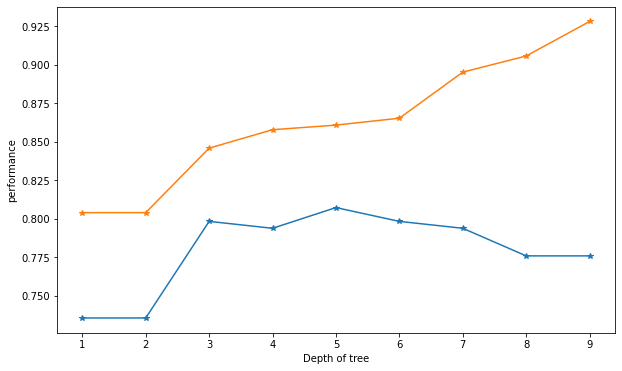

In [22]:
#Plot the train_accuracy and test_accuracy w.r.t max_depth
plt.figure(figsize=(10,6))
plt.plot(frame['max_depth'], frame['test_accuracy'], marker='*')
plt.plot(frame['max_depth'], frame['train_accuracy'], marker='*')
plt.xlabel('Depth of tree')
plt.ylabel('performance')

- Keeping the low value of max_depth, didnt allow the model to learn the pattern. Hence low prformance or Underfitting
- Magnitude of increase in Training accuracy is higher as compared to that with the Testing accuracy-
- **Max_depth= 5** produces the **highest Testing accuracy**,Hence can set the **max_depth = 5**

#### 2.Optimising max_leaf nodes

###### Keeping the max_depth = 5, lets check the max_leaf node parameter to get highest teating accuracy

In [23]:
train_accuracy = []
test_accuracy = []
#Keeping the max_depth = 8,take the range of the max_leaf_nodes(5,35,5) and check its train_accuracy and test_accuracy
for leaf_nodes in range(5,35,5):
    dt_model = DecisionTreeClassifier(max_leaf_nodes=leaf_nodes, max_depth=5, random_state=10)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train,y_train))
    test_accuracy.append(dt_model.score(X_test,y_test))    
frame = pd.DataFrame({"max_depth": 5,"max_leaf_nodes": range(5,35,5), "train_accuracy" : train_accuracy, "test_accuracy": test_accuracy})
frame

,max_depth,max_leaf_nodes,train_accuracy,test_accuracy
0,5,5,0.826347,0.762332
1,5,10,0.854790,0.793722
2,5,15,0.860778,0.802691
3,5,20,0.860778,0.802691
4,5,25,0.860778,0.802691
5,5,30,0.860778,0.802691


#### Cross Checking the Training Score and Testing Score

In [24]:
print("-"*50)
print("Training Score:", dt_model.score(X_train,y_train))
print("Testing Score:", dt_model.score(X_test,y_test))
print("-"*50)

--------------------------------------------------
Training Score: 0.8607784431137725
Testing Score: 0.8026905829596412
--------------------------------------------------


Text(0, 0.5, 'performance')

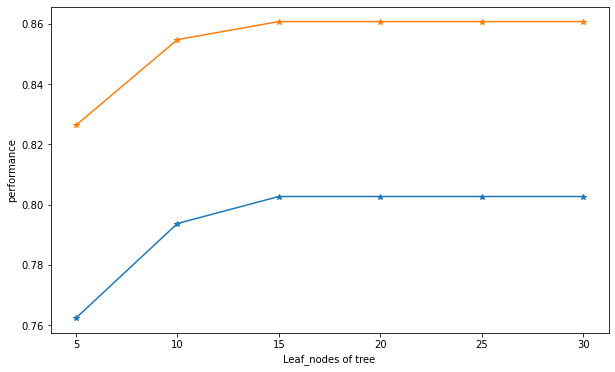

In [25]:
plt.figure(figsize=(10,6))
plt.plot(frame['max_leaf_nodes'],frame['test_accuracy'], marker='*')
plt.plot(frame['max_leaf_nodes'],frame['train_accuracy'], marker='*')
plt.xlabel('Leaf_nodes of tree')
plt.ylabel('performance')

- it can thus be observed that the test_accuracy is maximum at 0.802691 when max_leaf_nodes= 15  and there after remains constant.
- Hence we can take max_leaf_nodes as wither 15,20,25,30

#### Using GridSearchCV, Optimise the hper parameters to get the to get highest teating accuracy

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
para = {#"min_samples_split":[int(x) for x in range(0,14,2)],
       "max_leaf_nodes": [int(x) for x in np.linspace(5,35,7)],
       "max_depth" :[5]}

In [28]:
dt_GridSearch = GridSearchCV(dt_model, param_grid= para, scoring= "accuracy", n_jobs= -1, cv=3, verbose=2)

In [29]:
dt_GridSearch.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    3.6s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=30,
                                              random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [5],
                         'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35]},
             scoring='accuracy', verbose=2)

In [30]:
print("-"*50)
print("Training Score:", dt_GridSearch.score(X_train,y_train))
print("Testing Score:", dt_GridSearch.score(X_test,y_test))
print("-"*50)

--------------------------------------------------
Training Score: 0.8607784431137725
Testing Score: 0.8026905829596412
--------------------------------------------------


- The accuracy scores are more in sync as compared to what we got previously

In [31]:
dt_GridSearch.best_params_

{'max_depth': 5, 'max_leaf_nodes': 15}

In [32]:
dt_GridSearch.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, random_state=10)

- Using GridSearchCV, keeping the max_depth = 5, we have got the **max_leaf_nodes= 15**

#### Plot a Decision Tree using the best_estimators

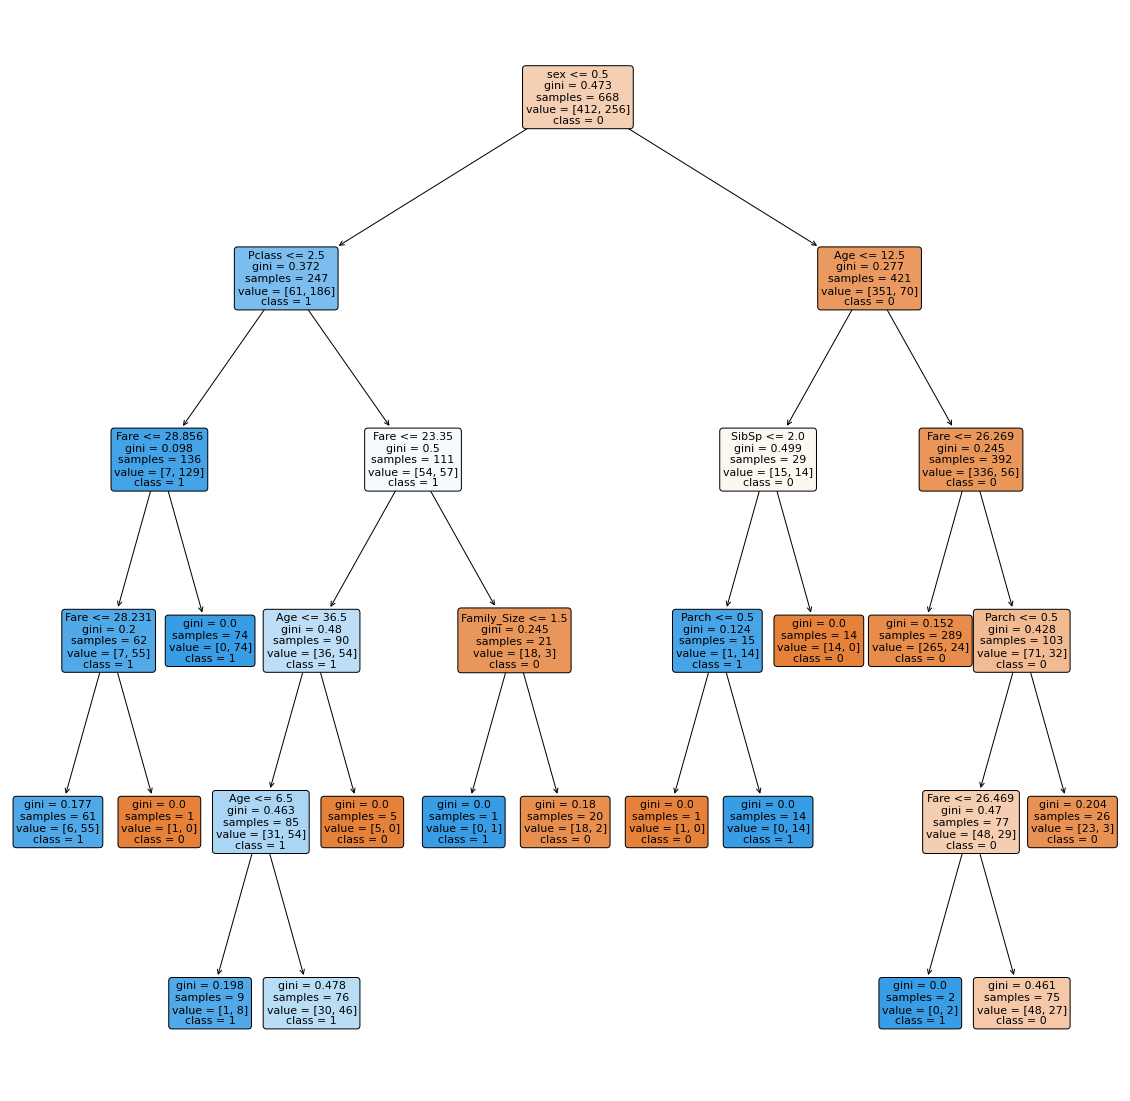

In [33]:
plt.figure(figsize=(20,20))
plot_tree(dt_GridSearch.best_estimator_, feature_names= X.columns,class_names=['0','1'],filled=True, fontsize=11, rounded= True)
plt.show()

#### Exporting Decision Trees in Textual Format

In [34]:
print(tree.export_text(dt_GridSearch.best_estimator_,feature_names=list(X.columns)))

|--- sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Fare <= 28.86
|   |   |   |--- Fare <= 28.23
|   |   |   |   |--- class: 1.0
|   |   |   |--- Fare >  28.23
|   |   |   |   |--- class: 0.0
|   |   |--- Fare >  28.86
|   |   |   |--- class: 1.0
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.35
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Age <= 6.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Age >  6.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- class: 0.0
|   |   |--- Fare >  23.35
|   |   |   |--- Family_Size <= 1.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- Family_Size >  1.50
|   |   |   |   |--- class: 0.0
|--- sex >  0.50
|   |--- Age <= 12.50
|   |   |--- SibSp <= 2.00
|   |   |   |--- Parch <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- Parch >  0.50
|   |   |   |   |--- class: 1.0
|   |   |--- SibSp >  2.00
|   |   |   |--- class: 0.0
|   |--- Age >  12.50
|   |   |--- Fare <= 26.27
|   |   |